In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

input_file = "D:/DataScience/LoanStats.csv"
df = pd.read_csv(input_file, header = 0)

C:\Users\sushma.bhat\AppData\Local\Enthought\Canopy\User\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       5000         5000           4975.0   36 months   
1 NaN        NaN       2500         2500           2500.0   60 months   
2 NaN        NaN       2400         2400           2400.0   36 months   
3 NaN        NaN      10000        10000          10000.0   36 months   
4 NaN        NaN       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 ...                  \
0   10.65%       162.87     B        B2                 ...                   
1   15.27%        59.83     C        C4                 ...                   
2   15.96%        84.33     C        C5                 ...                   
3   13.49%       339.31     C        C1                 ...                   
4   12.69%        67.79     B        B5                 ...                   

  sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc  \
0                      NaN                    NaN              NaN   
1                      NaN                    NaN              NaN   
2                      NaN                    NaN              NaN   
3                      NaN                    NaN              NaN   
4                      NaN                    NaN              NaN   

   sec_app_open_acc sec_app_revol_util sec_app_open_il_6m  \
0               NaN                NaN                NaN   
1               NaN                NaN                NaN   
2               NaN                NaN                NaN   
3               NaN                NaN                NaN   
4               NaN                NaN                NaN   

  sec_app_num_rev_accts sec_app_chargeoff_within_12_mths  \
0                   NaN                              NaN   
1                   NaN                              NaN   
2                   NaN                              NaN   
3                   NaN                              NaN   
4                   NaN                              NaN   

   sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog  
0                                 NaN                                 NaN  
1                                 NaN                                 NaN  
2                                 NaN                                 NaN  
3                                 NaN                                 NaN  
4                                 NaN                                 NaN  

[5 rows x 122 columns]

In [3]:
df.drop(['id', 'member_id', 'desc'], axis=1, inplace=True)

In [4]:
df.drop(['mths_since_last_record'], axis=1, inplace=True)

In [5]:
df.head()
df['term'] = df['term'].map(lambda x: x.rstrip(' months')).convert_objects(convert_numeric=True)
df.head()

C:\Users\sushma.bhat\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment grade  \
0       5000         5000           4975.0    36   10.65%       162.87     B   
1       2500         2500           2500.0    60   15.27%        59.83     C   
2       2400         2400           2400.0    36   15.96%        84.33     C   
3      10000        10000          10000.0    36   13.49%       339.31     C   
4       3000         3000           3000.0    60   12.69%        67.79     B   

  sub_grade                 emp_title emp_length  \
0        B2                       NaN  10+ years   
1        C4                     Ryder   < 1 year   
2        C5                       NaN  10+ years   
3        C1       AIR RESOURCES BOARD  10+ years   
4        B5  University Medical Group     1 year   

                  ...                 sec_app_earliest_cr_line  \
0                 ...                                      NaN   
1                 ...                                      NaN   
2                 ...                                      NaN   
3                 ...                                      NaN   
4                 ...                                      NaN   

   sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc  \
0                     NaN              NaN              NaN   
1                     NaN              NaN              NaN   
2                     NaN              NaN              NaN   
3                     NaN              NaN              NaN   
4                     NaN              NaN              NaN   

  sec_app_revol_util sec_app_open_il_6m  sec_app_num_rev_accts  \
0                NaN                NaN                    NaN   
1                NaN                NaN                    NaN   
2                NaN                NaN                    NaN   
3                NaN                NaN                    NaN   
4                NaN                NaN                    NaN   

  sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med  \
0                              NaN                                NaN   
1                              NaN                                NaN   
2                              NaN                                NaN   
3                              NaN                                NaN   
4                              NaN                                NaN   

  sec_app_mths_since_last_major_derog  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 118 columns]

In [6]:
funcIsNull = lambda x: (1.00 -sum(pd.isnull(x))/len(x))>0 
df=df.loc[:, df.apply(funcIsNull)]

In [7]:
df.drop(['next_pymnt_d'], axis=1, inplace=True)

In [8]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment grade  \
0       5000         5000           4975.0    36   10.65%       162.87     B   
1       2500         2500           2500.0    60   15.27%        59.83     C   
2       2400         2400           2400.0    36   15.96%        84.33     C   
3      10000        10000          10000.0    36   13.49%       339.31     C   
4       3000         3000           3000.0    60   12.69%        67.79     B   

  sub_grade                 emp_title emp_length    ...    last_pymnt_amnt  \
0        B2                       NaN  10+ years    ...             171.62   
1        C4                     Ryder   < 1 year    ...             119.66   
2        C5                       NaN  10+ years    ...             649.91   
3        C1       AIR RESOURCES BOARD  10+ years    ...             357.48   
4        B5  University Medical Group     1 year    ...              67.30   

   last_credit_pull_d collections_12_mths_ex_med policy_code application_type  \
0              17-May                        0.0           1       INDIVIDUAL   
1              16-Oct                        0.0           1       INDIVIDUAL   
2              17-May                        0.0           1       INDIVIDUAL   
3              16-Apr                        0.0           1       INDIVIDUAL   
4              17-Jan                        0.0           1       INDIVIDUAL   

  acc_now_delinq chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies  \
0            0.0                      0.0         0.0                  0.0   
1            0.0                      0.0         0.0                  0.0   
2            0.0                      0.0         0.0                  0.0   
3            0.0                      0.0         0.0                  0.0   
4            0.0                      0.0         0.0                  0.0   

  tax_liens  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 51 columns]

In [9]:
d = {'Charged Off': 0, 'Fully Paid': 1, 'Does not meet the credit policy. Status:Fully Paid':1, 'Does not meet the credit policy. Status:Charged Off':0}
df['is_bad'] = df['loan_status'].map(d)

df['is_bad']

0        1
1        0
2        1
3        1
4        1
5        1
6        1
7        1
8        0
9        0
10       1
11       1
12       0
13       1
14       0
15       1
16       1
17       1
18       1
19       1
20       1
21       0
22       1
23       1
24       0
25       1
26       0
27       0
28       1
29       1
        ..
42505    0
42506    1
42507    1
42508    1
42509    1
42510    1
42511    1
42512    1
42513    1
42514    1
42515    1
42516    1
42517    1
42518    1
42519    1
42520    1
42521    0
42522    1
42523    1
42524    0
42525    1
42526    1
42527    1
42528    1
42529    0
42530    1
42531    1
42532    1
42533    1
42534    1
Name: is_bad, dtype: int64

In [10]:
df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']]

df = df.fillna(df.mean())

In [11]:
from sklearn import tree
df.head()
df['term'] = df['term'].convert_objects(convert_numeric=True)
df.head()

C:\Users\sushma.bhat\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


loan_amnt  funded_amnt  funded_amnt_inv  term int_rate  installment grade  \
0       5000         5000           4975.0    36   10.65%       162.87     B   
1       2500         2500           2500.0    60   15.27%        59.83     C   
2       2400         2400           2400.0    36   15.96%        84.33     C   
3      10000        10000          10000.0    36   13.49%       339.31     C   
4       3000         3000           3000.0    60   12.69%        67.79     B   

  sub_grade                 emp_title emp_length  ...   last_credit_pull_d  \
0        B2                       NaN  10+ years  ...               17-May   
1        C4                     Ryder   < 1 year  ...               16-Oct   
2        C5                       NaN  10+ years  ...               17-May   
3        C1       AIR RESOURCES BOARD  10+ years  ...               16-Apr   
4        B5  University Medical Group     1 year  ...               17-Jan   

   collections_12_mths_ex_med policy_code application_type acc_now_delinq  \
0                         0.0           1       INDIVIDUAL            0.0   
1                         0.0           1       INDIVIDUAL            0.0   
2                         0.0           1       INDIVIDUAL            0.0   
3                         0.0           1       INDIVIDUAL            0.0   
4                         0.0           1       INDIVIDUAL            0.0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens is_bad  
0                      0.0         0.0                  0.0       0.0      1  
1                      0.0         0.0                  0.0       0.0      0  
2                      0.0         0.0                  0.0       0.0      1  
3                      0.0         0.0                  0.0       0.0      1  
4                      0.0         0.0                  0.0       0.0      1  

[5 rows x 52 columns]

In [12]:
y = df['is_bad']
X = df[['term','funded_amnt','mths_since_last_delinq', 'total_rec_prncp','recoveries']]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)


In [13]:
with open("classifier.txt", "w") as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=list(X))

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
X = df[['loan_amnt', 'term', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']]

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 5
Selected Features: [False  True  True False False False False False False  True False False
 False False False False False False  True False False  True False False
 False False False False False False False]
Feature Ranking: [15  1  1  6 10 16  5 19 13  1  8 17 21  4 26 27  3  7  1  2  9  1 11 14 24
 12 22 25 20 18 23]


In [16]:
list(X)

['loan_amnt',
 'term',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

tempDf = df[['term','funded_amnt','mths_since_last_delinq', 'total_rec_prncp','recoveries']]

C:\Users\sushma.bhat\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tempDf, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[1 1 1 ..., 1 1 1]


In [20]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[  4.39295208e-04   9.99560705e-01]
 [  1.55148856e-03   9.98448511e-01]
 [  2.42296132e-06   9.99997577e-01]
 ..., 
 [  1.12428667e-08   9.99999989e-01]
 [  6.68702871e-11   1.00000000e+00]
 [  4.46521862e-08   9.99999955e-01]]


C:\Users\sushma.bhat\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [21]:
# generate evaluation metrics
from sklearn import metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.999529817412
0.999897232491


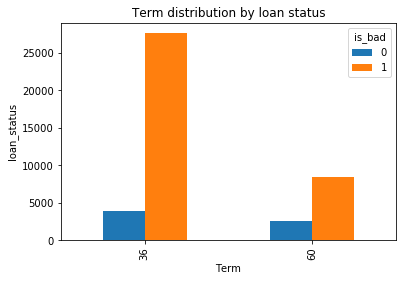

In [22]:
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

pd.crosstab(df['term'], df['is_bad']).plot(kind='bar')
plt.title('Term distribution by loan status')
plt.xlabel('Term')
plt.ylabel('loan_status')

In [23]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

In [24]:
probs = clf.predict_proba(X_test)
print probs

predict = clf.predict(X_test)
print predict

[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
[1 1 1 ..., 1 1 1]


In [25]:
print metrics.accuracy_score(y_test, predict)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.999686544942
0.999746153465


In [26]:
import seaborn as sns
sns.set(color_codes=True)

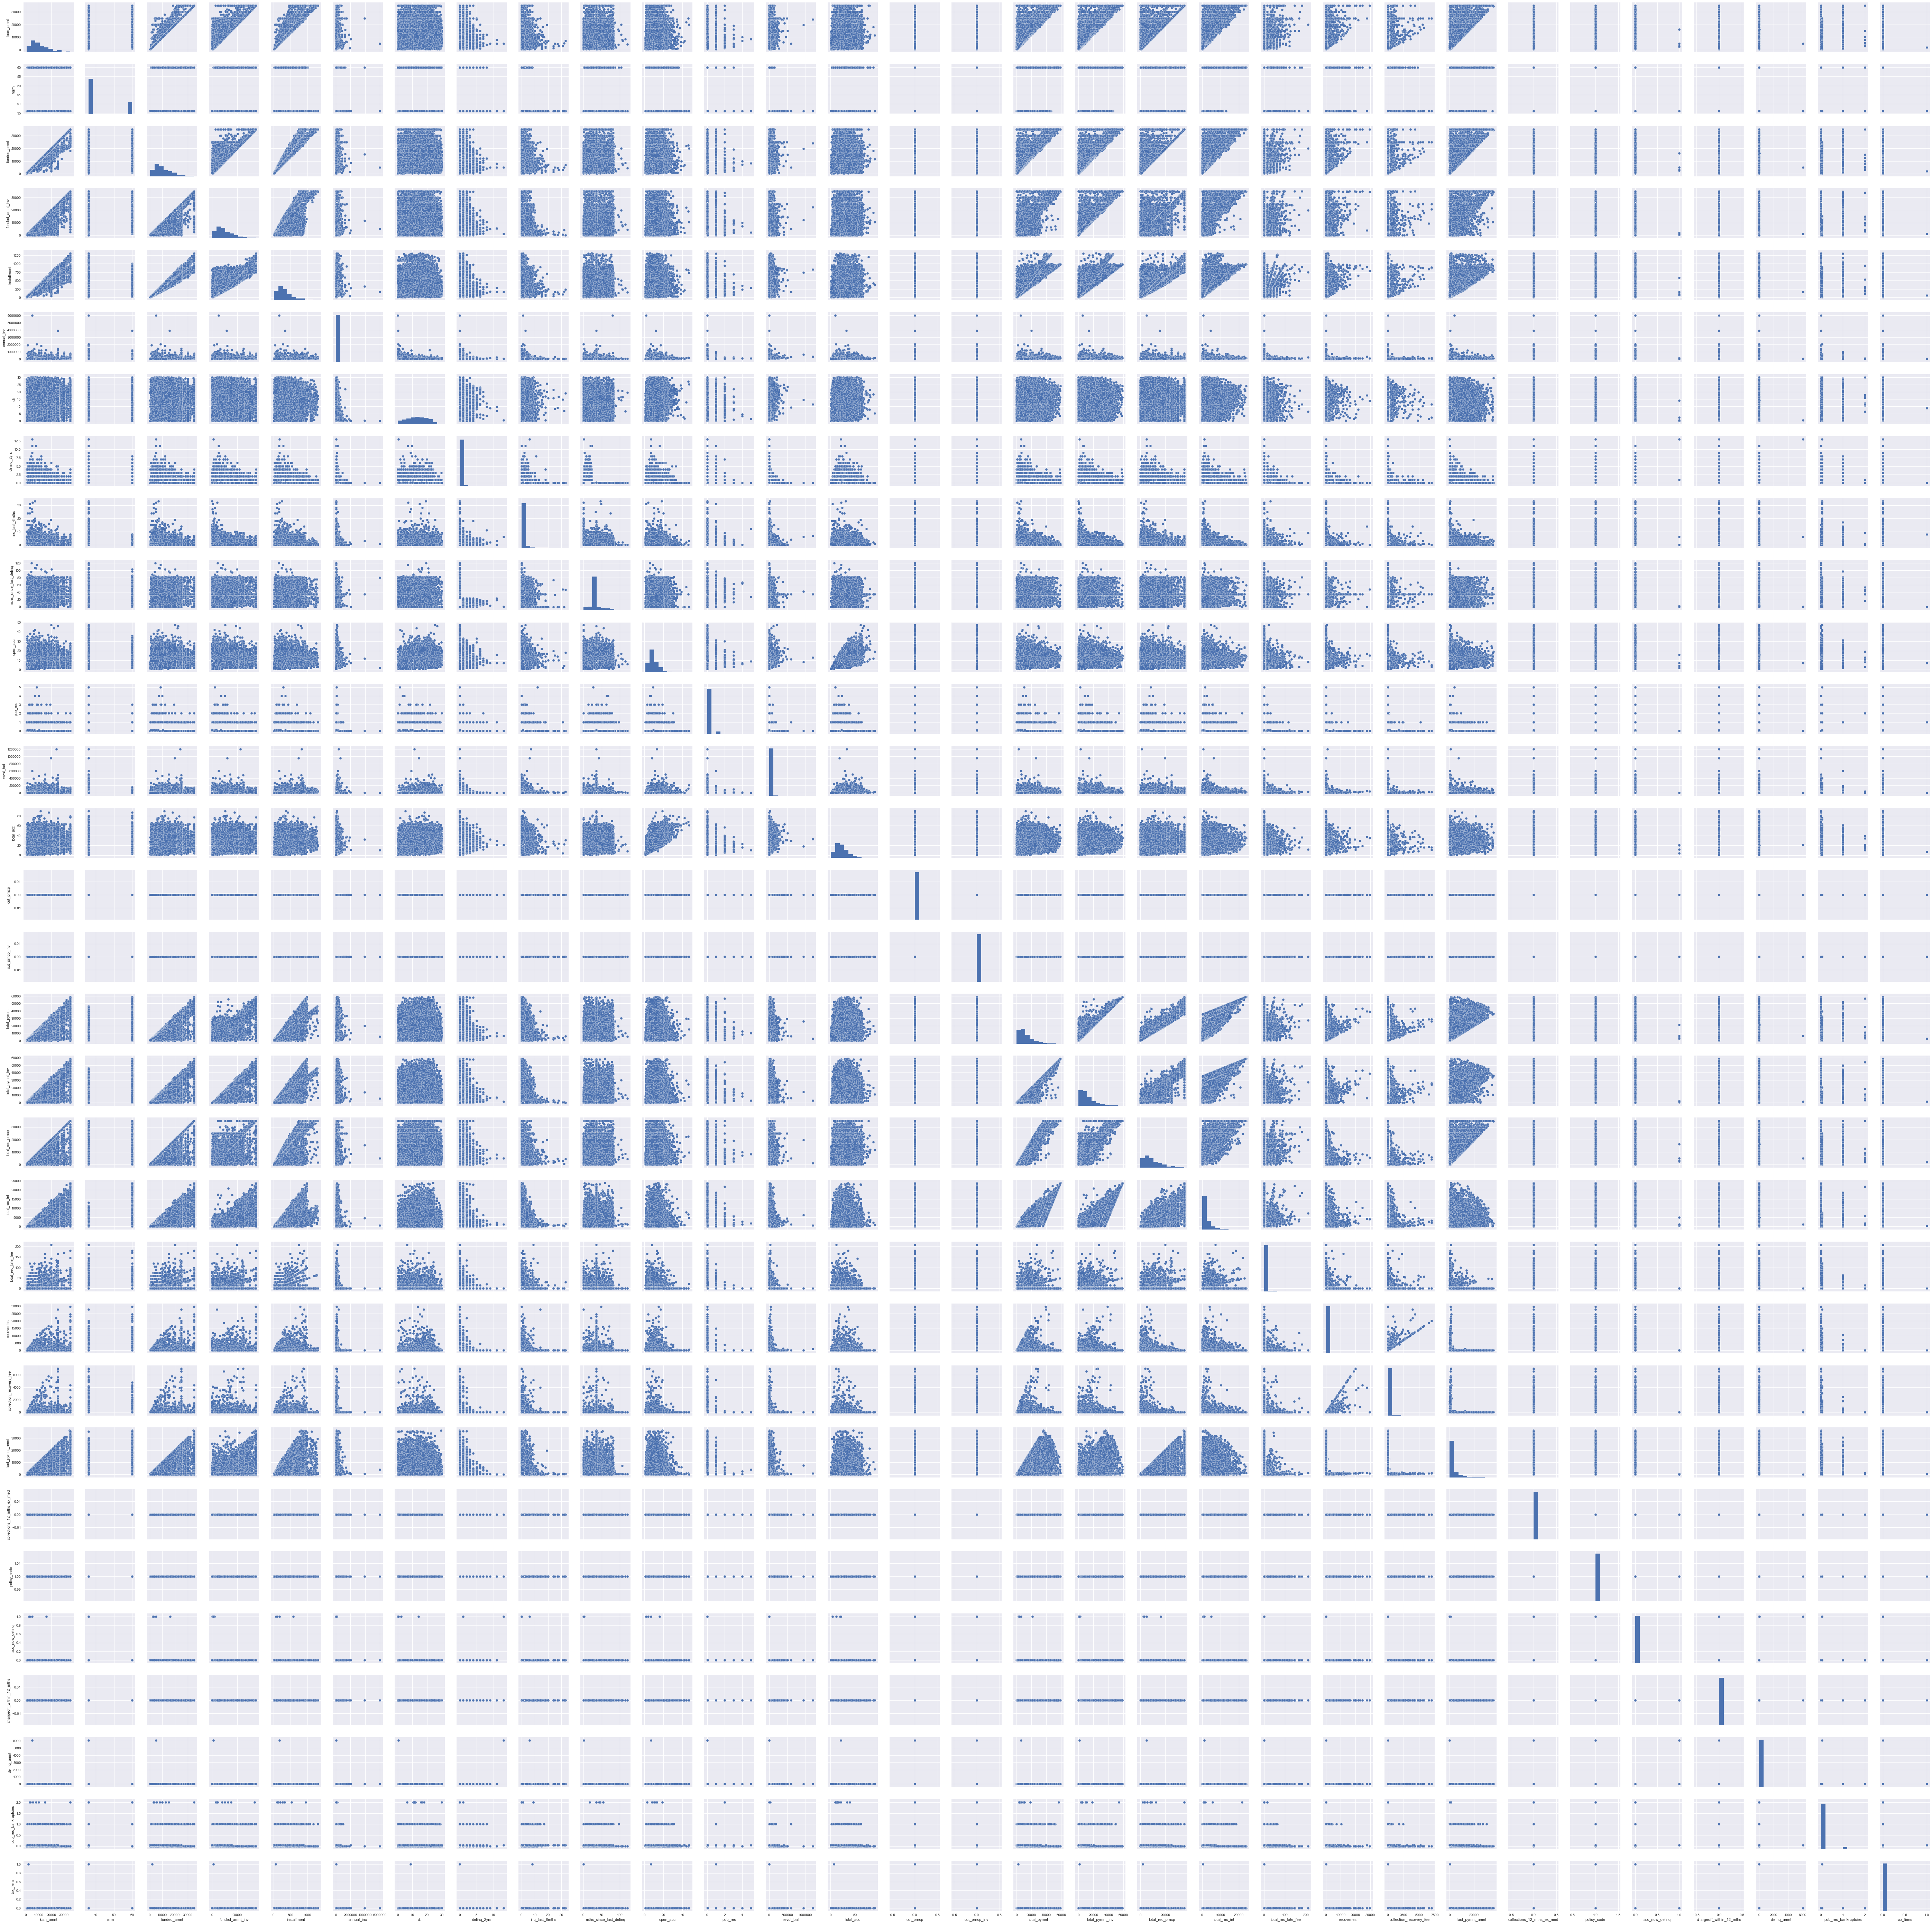

In [ ]:
%matplotlib inline

AttributeError: 'PairGrid' object has no attribute 'show'

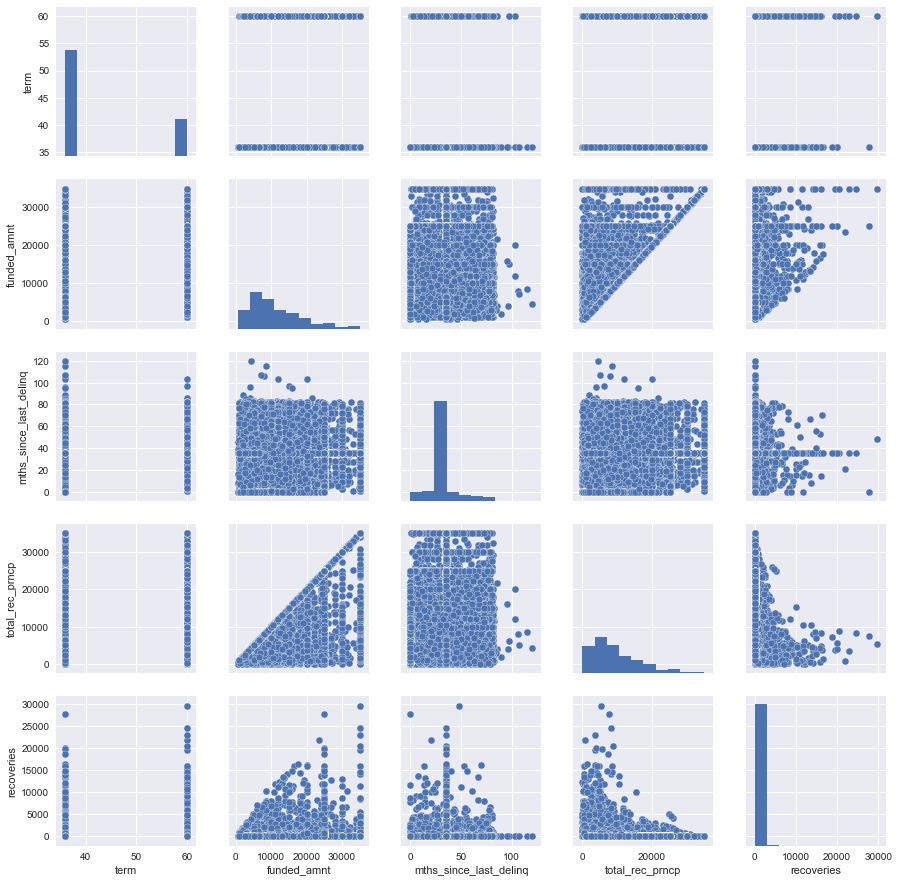

In [32]:
a=df['funded_amnt']
b=df['is_bad']

sns.pairplot(tempDf).show()